In [144]:
import json
import requests
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
import pandas as pd
import seaborn as sns 
import itertools
import collections
import random
import time

In [145]:
data_dir = 'results'
before = 'pangaea_20200804.json'

In [146]:
def read_results(data):
    final = []
    for data_dict in data:
        results = {}
        results['identifier'] = data_dict['identifier']
        dd = data_dict['result'] # list of dict
        for d in dd:
            metric_identifier = d.get('metric_identifier')
            sub_principle = metric_identifier.split('-')[1]
            principle = sub_principle[0]+'_earned'
            principle_total = sub_principle[0]+'_total'
            if not sub_principle in results:
                results[sub_principle] = d['score']['earned']
            else:
                results[sub_principle] += d['score']['earned']
            if not principle in results:
                results[principle] = d['score']['earned']
            else:
                results[principle] += d['score']['earned']
            if not principle_total in results:
                results[principle_total] = d['score']['total']
            else:
                results[principle_total] += d['score']['total']
        final.append(results)
    
    df_results = pd.DataFrame.from_dict(final)
    cols = ['identifier','F1','F2','F3','F4','A1','A1','I1','I3','R1','R1.1','R1.2','R1.3','F_earned','F_total','A_earned','A_total','I_earned','I_total','R_earned','R_total']
    df_results = df_results[cols]
    
    df_results ['F_Principle'] = (df_results ['F_earned'] / df_results ['F_total'] ).round(2)
    df_results ['A_Principle'] = (df_results ['A_earned'] / df_results ['A_total'] ).round(2)
    df_results ['I_Principle'] = (df_results ['I_earned'] / df_results ['I_total'] ).round(2)
    df_results ['R_Principle' ]= (df_results ['R_earned'] / df_results ['R_total'] ).round(2)
    df_results = df_results[['identifier','F_Principle','A_Principle','I_Principle','R_Principle']]
    return df_results

In [161]:
def histograms_plot(dataframe, features, rows, cols, figname, title):
    fig=plt.figure(figsize=(20,4))
    # set palette 
    palette = itertools.cycle(sns.color_palette())
    for i, feature in enumerate(features):
        c = next(palette)
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].plot.hist(bins=20, ax=ax, color=c, range=(0, 1.0), align="right")
        ax.set_title(principles.get(feature))
        ax.set(xlabel="Score", ylabel="Frequency")
    fig.subplots_adjust(top=0.8)
    plt.savefig(figname)
    plt.suptitle(title,fontsize=15)
    plt.show()

In [162]:
principles = {}
principles['F_Principle'] = 'Findability'
principles['A_Principle'] = 'Accessibility'
principles['I_Principle'] = 'Interoperability'
principles['R_Principle'] = 'Reusability'

timestr = time.strftime("%Y%m%d")

visualize score before improvement

In [163]:
with open(data_dir+'/'+before) as json_file:
    before_data = json.load(json_file)
df_before = read_results(before_data)
df_before.head()

,identifier,F_Principle,A_Principle,I_Principle,R_Principle
0,https://doi.org/10.1594/PANGAEA.864717,0.86,0.0,0.75,0.78
1,https://doi.org/10.1594/PANGAEA.429817,0.86,0.0,0.75,0.78
2,https://doi.org/10.1594/PANGAEA.400185,0.86,0.0,0.75,0.78
3,https://doi.org/10.1594/PANGAEA.130277,0.86,0.0,0.75,0.78
4,https://doi.org/10.1594/PANGAEA.137862,0.86,0.0,0.75,0.78


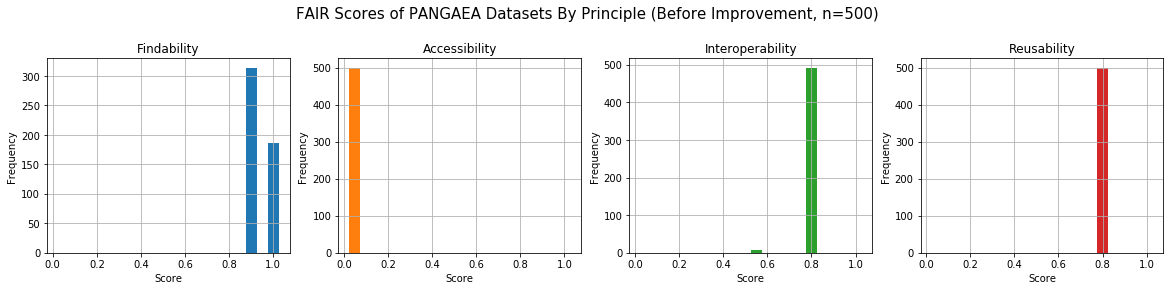

In [164]:
fig_name_before = data_dir+'/'+'sub_pangaea_before_'+timestr+'.png'
title_before = 'FAIR Scores of PANGAEA Datasets By Principle (Before Improvement,'+ ' n=' + str(len(df_before))+')'
histograms_plot(df_before, df_before.columns[1:], 1, 4, fig_name_before, title_before)

Assess previous datasets

In [151]:
datasets = df_before['identifier'].tolist()

In [152]:
%%time
fuji_service = 'http://localhost:1071/fuji/api/v1/evaluate'
after_data = []
for d in datasets:
    req = {'object_identifier':d, 'test_debug':True}
    r = requests.post(fuji_service, data=json.dumps(req), headers={'Content-Type': 'application/json'}, auth=('username', 'password'))
    json_data = r.json()
    records = {}
    records['identifier'] = d
    records['result'] = json_data
    after_data.append(records)

Wall time: 41min 20s


In [153]:
file_name = data_dir+'/'+'pangaea_'+timestr+'.json'
with open(file_name, 'w') as f:
    json.dump(after_data, f)

In [154]:
file_name ='results/pangaea_20200807.json'
with open(file_name) as json_file:
    after_data = json.load(json_file)
df_after = read_results(after_data)
df_after.head()

,identifier,F_Principle,A_Principle,I_Principle,R_Principle
0,https://doi.org/10.1594/PANGAEA.864717,0.86,1.0,0.75,0.89
1,https://doi.org/10.1594/PANGAEA.429817,0.86,1.0,0.75,0.89
2,https://doi.org/10.1594/PANGAEA.400185,0.86,1.0,0.75,0.89
3,https://doi.org/10.1594/PANGAEA.130277,0.86,1.0,0.75,0.89
4,https://doi.org/10.1594/PANGAEA.137862,0.86,1.0,0.75,0.89


In [155]:
b = df_before['identifier'].tolist()
a = df_after['identifier'].tolist()

if set(a) == set(b):
    print('same')

same


In [156]:
df_after.head()

,identifier,F_Principle,A_Principle,I_Principle,R_Principle
0,https://doi.org/10.1594/PANGAEA.864717,0.86,1.0,0.75,0.89
1,https://doi.org/10.1594/PANGAEA.429817,0.86,1.0,0.75,0.89
2,https://doi.org/10.1594/PANGAEA.400185,0.86,1.0,0.75,0.89
3,https://doi.org/10.1594/PANGAEA.130277,0.86,1.0,0.75,0.89
4,https://doi.org/10.1594/PANGAEA.137862,0.86,1.0,0.75,0.89


In [157]:
df_after[df_after.F_Principle<0.8]

,identifier,F_Principle,A_Principle,I_Principle,R_Principle


In [158]:
df_before[df_before.identifier=='https://doi.org/10.1594/PANGAEA.398005']

,identifier,F_Principle,A_Principle,I_Principle,R_Principle
305,https://doi.org/10.1594/PANGAEA.398005,1.0,0.0,0.75,0.78


visualize score after improvement

In [159]:
with open(file_name) as json_file:
    data = json.load(json_file)

df_after = read_results(data)
df_after.head()

,identifier,F_Principle,A_Principle,I_Principle,R_Principle
0,https://doi.org/10.1594/PANGAEA.864717,0.86,1.0,0.75,0.89
1,https://doi.org/10.1594/PANGAEA.429817,0.86,1.0,0.75,0.89
2,https://doi.org/10.1594/PANGAEA.400185,0.86,1.0,0.75,0.89
3,https://doi.org/10.1594/PANGAEA.130277,0.86,1.0,0.75,0.89
4,https://doi.org/10.1594/PANGAEA.137862,0.86,1.0,0.75,0.89


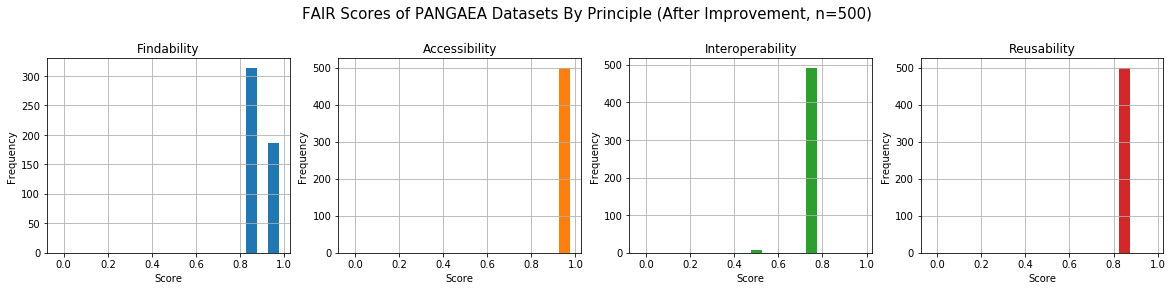

In [160]:
fig_name_after = data_dir+'/'+'sub_pangaea_after_'+timestr+'.png'
title_after = 'FAIR Scores of PANGAEA Datasets By Principle (After Improvement,'+ ' n=' + str(len(df_after))+')'
histograms_plot(df_after, df_after.columns[1:], 1, 4, fig_name_after, title_after)